<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Assignment:  Machine Learning Prediction


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
#import piplite
#await piplite.install(['numpy'])
#await piplite.install(['pandas'])
#await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
#'''from js import fetch
#import io

#URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
#resp1 = await fetch(URL1)
#text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
#data = pd.read_csv(text1)'''

In [126]:
#This data contines the Outcome of the Landing --> Y vector!!
#data.to_csv("dataset_part_2.csv")
Ydata = pd.read_csv("dataset_part_2.csv")
Ydata.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
#URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
#resp2 = await fetch(URL2)
#text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
#X = pd.read_csv(text2)

In [127]:
#This data contains the feature data -- > X
#X.to_csv("dataset_part_3.csv")
Xdata = pd.read_csv("dataset_part_3.csv")

In [111]:
Xdata.head(2)

,Unnamed: 0,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [128]:
Y = Ydata['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [129]:
#Note: this transform changes X to a numpy array
transformObject = preprocessing.StandardScaler()
X = transformObject.fit_transform(Xdata)

In [130]:
X

array([[-1.71291154e+00, -1.71291154e+00, -1.94814463e-16, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.67441914e+00, -1.19523159e+00, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.63592675e+00, -1.16267307e+00, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.63592675e+00,  1.99100483e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.67441914e+00,  1.99100483e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00,  1.71291154e+00, -5.19213966e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [131]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

we can see we only have 18 test samples.


In [132]:
print(Y_train.shape, " ", Y_test.shape)

(72,)   (18,)


In [133]:
print(X_train.shape, " ", X_test.shape)

(72, 84)   (18, 84)


## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [134]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(lr, parameters, cv=10)

# Fit it to the data
logreg_cv.fit(X_train, Y_train)

# Access the best estimator after GridSearchCV
best_lr = logreg_cv.best_estimator_

# Access coefficients of the best logistic regression model
coefficients = best_lr.coef_
coefficients

array([[ 4.44552463e-02,  4.44552463e-02,  2.20582562e-02,
        -2.09093643e-03,  5.02542342e-02,  7.64513449e-02,
         2.43402156e-02,  1.65496525e-02, -4.49650679e-02,
         7.15370002e-08, -1.46100627e-04,  3.48461493e-02,
        -7.92981646e-03, -5.99082970e-04, -4.26297103e-02,
         2.37206351e-02,  2.12090788e-02, -2.41190339e-02,
         1.51346607e-02,  1.49449642e-02,  5.32741209e-02,
         2.38486830e-02,  5.05104820e-02,  1.01741794e-07,
         2.66502060e-02,  7.15370002e-08, -3.13972387e-02,
        -2.92162207e-02,  7.15370002e-08, -2.78866407e-02,
        -2.79556862e-02,  3.75526460e-02,  3.51589656e-02,
        -2.82221039e-02, -2.98075045e-02, -2.82708528e-02,
         7.15370002e-08,  2.43402156e-02,  7.15370002e-08,
         7.15370002e-08, -5.42204817e-02, -5.30143105e-02,
         2.32710241e-02, -5.15816224e-02,  1.89032297e-02,
         2.66893223e-02,  7.15370002e-08,  2.37595797e-02,
         7.15370002e-08, -5.32193638e-02,  1.72359627e-0

In [139]:
# Get the names of the features or columns
feature_names = list(Xdata.columns)  # Replace X_train with your feature matrix

# Map coefficients to feature names
coefficients = best_lr.coef_[0]  # Assuming it's a 1D array

# Create a dictionary mapping feature names to coefficients
coefficients_dict = dict(zip(feature_names, coefficients))

# Print feature names and their corresponding coefficients
for feature, coef in coefficients_dict.items():
    print(f"Feature: {feature}, Coefficient: {coef}")


Feature: Unnamed: 0, Coefficient: 0.04445524627990611
Feature: FlightNumber, Coefficient: 0.04445524627990611
Feature: PayloadMass, Coefficient: 0.022058256151568794
Feature: Flights, Coefficient: -0.0020909364292993845
Feature: Block, Coefficient: 0.05025423419967265
Feature: ReusedCount, Coefficient: 0.07645134491645508
Feature: Orbit_ES-L1, Coefficient: 0.024340215643798804
Feature: Orbit_GEO, Coefficient: 0.01654965253080575
Feature: Orbit_GTO, Coefficient: -0.044965067925297565
Feature: Orbit_HEO, Coefficient: 7.1537000219101e-08
Feature: Orbit_ISS, Coefficient: -0.0001461006268255944
Feature: Orbit_LEO, Coefficient: 0.0348461493388223
Feature: Orbit_MEO, Coefficient: -0.007929816460111375
Feature: Orbit_PO, Coefficient: -0.0005990829700134756
Feature: Orbit_SO, Coefficient: -0.042629710318108145
Feature: Orbit_SSO, Coefficient: 0.02372063506540716
Feature: Orbit_VLEO, Coefficient: 0.021209078833606166
Feature: LaunchSite_CCAFS SLC 40, Coefficient: -0.024119033940839026
Feature: L

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [18]:
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [19]:
L_acc = logreg_cv.score(X_test, Y_test)
L_acc

0.8333333333333334

Lets look at the confusion matrix:


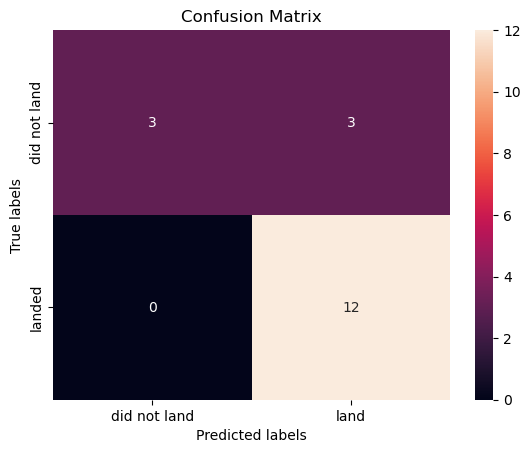

In [20]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [21]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [22]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [23]:
print("tuned hyperparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hyperparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8214285714285714


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [24]:
SVM_acc = svm_cv.score(X_test, Y_test)
SVM_acc

0.8333333333333334

We can plot the confusion matrix


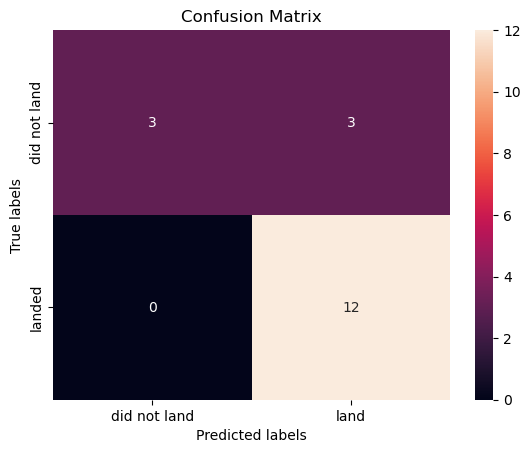

In [25]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [78]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     #'max_features': ['auto', 'sqrt'],
     'max_features': ['log2', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [79]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [80]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [81]:
tree_acc = tree_cv.score(X_test, Y_test)
tree_acc

0.8333333333333334

We can plot the confusion matrix


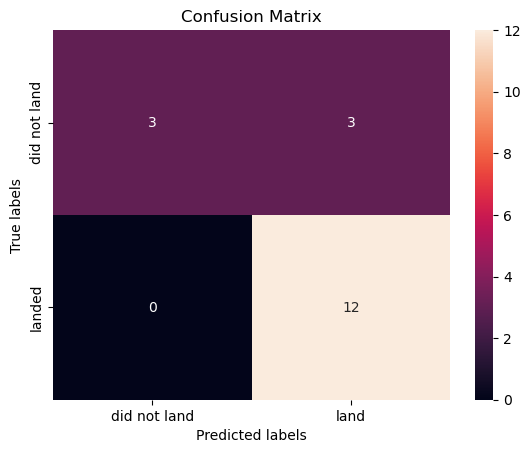

In [82]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [31]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [32]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [33]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [34]:
knn_acc = knn_cv.score(X_test, Y_test)
knn_acc

0.8333333333333334

We can plot the confusion matrix


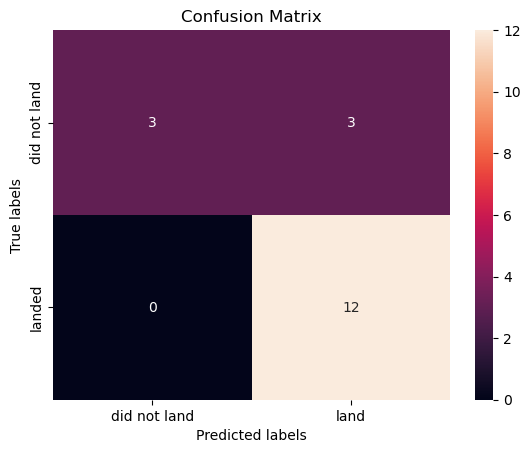

In [35]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [83]:
print("Results --- !")
accuracyDict = {'KNN':knn_acc, 'TREE':tree_acc, 'SVM':SVM_acc, 'L':L_acc}
winnerVal = -1.0
winnerName = "none"
for key, value in accuracyDict.items():
    print(key,": ", value)
    if(winnerVal<value):
        winnerVal=value
        winnerName = key
        
print("The winner is: ", winnerName, "with accuracy = ", winnerVal)

Results --- !
KNN :  0.8333333333333334
TREE :  0.8333333333333334
SVM :  0.8333333333333334
L :  0.8333333333333334
The winner is:  KNN with accuracy =  0.8333333333333334


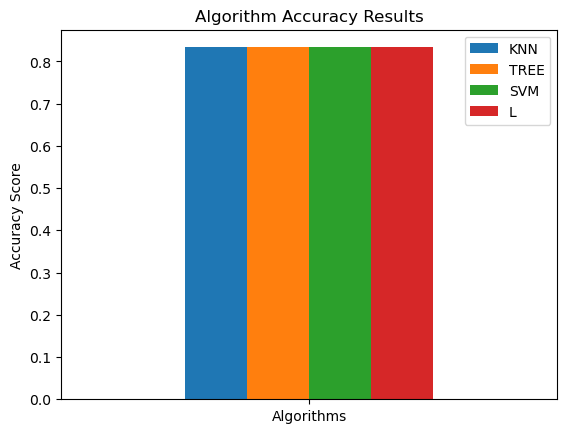

In [84]:
index = ['Algorithms']
accuracy_df = pd.DataFrame(accuracyDict, index=index)

# Plotting the bar chart
accuracy_df.plot.bar(rot=0)  # 'rot=0' rotates the x-axis labels if needed
#plt.xlabel('Labels')  # Add label for x-axis
plt.ylabel('Accuracy Score')  # Add label for y-axis
plt.title('Algorithm Accuracy Results')  # Add title to the plot
plt.show()


In [ ]:
## --------------Is it Odd they are all the same ----?

In [85]:
#Test on entire dataset
knn_acc_All = knn_cv.score(X,Y)
knn_acc_All

0.8444444444444444

In [86]:
tree_acc_All = tree_cv.score(X,Y)
tree_acc_All

0.8555555555555555

In [87]:
SVM_acc_All = svm_cv.score(X,Y)
SVM_acc_All

0.9333333333333333

In [88]:
L_acc_All = logreg_cv.score(X,Y)
L_acc_All

0.8666666666666667

<h1>Final choice is Logistic Regression.  </h1>
1) Logistic Regression, SVM and KNN all have the same accuracy values on the test data
so,
2) Logistic Regression is prefered as it provides coefficients that represent the impact of features on the predicted outcome, allowing for easy interpretation and understanding of the model's behavior.  
3) Logistic Regression is also generally faster to train and predict

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork865-2023-01-01)


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
